## Section 2

In [109]:
import pandas as pd

df_articles = pd.read_csv('shared_articles.csv', index_col='contentId')
df_users = pd.read_csv('users_interactions.csv')



In [110]:
display(df_users.head())
df_articles.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


,timestamp,eventType,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
contentId,,,,,,,,,,,,
-6451309518266745024,1459192779,CONTENT REMOVED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
-4110354420726924665,1459193988,CONTENT SHARED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
-7292285110016212249,1459194146,CONTENT SHARED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
-6151852268067518688,1459194474,CONTENT SHARED,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
2448026894306402386,1459194497,CONTENT SHARED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [111]:
print('Min:\t\t', df_users['personId'].value_counts().min())
print('Quartile 1:\t', df_users['personId'].value_counts().quantile(.25))
print('Median:\t\t', df_users['personId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_users['personId'].value_counts().quantile(.75))
print('Max:\t\t', df_users['personId'].value_counts().max())

Min:		 1
Quartile 1:	 3.0
Median:		 10.0
Quartile 3:	 32.0
Max:		 1885


In [112]:
value_counts = df_users.contentId.value_counts()
keep_list = value_counts[value_counts >= 9]
df_users_reduced = df_users.loc[df_users.contentId.isin(keep_list.index)]

In [113]:
df_users_reduced["eventType"] = df_users_reduced["eventType"].replace({
    "VIEW": 1,
    "LIKE": 2,
    "FOLLOW": 3,
    "BOOKMARK": 4,
    "COMMENT CREATED": 5
})

/var/folders/89/ddk09q_13q5dxg5njh_qm7p40000gn/T/ipykernel_23696/1775957036.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_users_reduced["eventType"] = df_users_reduced["eventType"].replace({
/var/folders/89/ddk09q_13q5dxg5njh_qm7p40000gn/T/ipykernel_23696/1775957036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_reduced["eventType"] = df_users_reduced["eventType"].replace({


In [114]:
import numpy as np
from scipy.sparse import csr_matrix

# Count the number of users and movies so that we know columns x rows
U = df_users_reduced['personId'].nunique()
I = df_users_reduced['contentId'].nunique()

# Maps the existing user and item IDs to a set of consequtive integers (0, 1, 2, 3)
user_mapper = dict(zip(np.unique(df_users_reduced['personId']), list(range(U))))
item_mapper = dict(zip(np.unique(df_users_reduced['contentId']), list(range(I))))
# Reverse the mapping for later retrieval of recommended items
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_users_reduced['personId'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_users_reduced['contentId'])))

# Create a list of userIds and itemIds for every time a rating appears
user_index = [user_mapper[i] for i in df_users_reduced['personId']]
item_index = [item_mapper[i] for i in df_users_reduced['contentId']]

X = csr_matrix((df_users_reduced['eventType'], (item_index, user_index)), shape=(I, U))
print(X)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 37601 stored elements and shape (1967, 1880)>
  Coords	Values
  (0, 225)	2
  (0, 332)	9
  (0, 827)	17
  (0, 1133)	15
  (0, 1852)	4
  (1, 2)	3
  (1, 130)	1
  (1, 209)	3
  (1, 553)	1
  (1, 933)	1
  (1, 938)	4
  (1, 1140)	3
  (1, 1225)	15
  (1, 1487)	1
  (1, 1520)	1
  (2, 40)	1
  (2, 159)	1
  (2, 197)	1
  (2, 333)	1
  (2, 628)	1
  (2, 648)	1
  (2, 816)	11
  (2, 900)	1
  (2, 928)	4
  (2, 995)	1
  :	:
  (1966, 235)	1
  (1966, 302)	1
  (1966, 305)	4
  (1966, 399)	3
  (1966, 784)	5
  (1966, 795)	1
  (1966, 902)	1
  (1966, 970)	1
  (1966, 1070)	1
  (1966, 1127)	1
  (1966, 1211)	1
  (1966, 1238)	1
  (1966, 1253)	5
  (1966, 1309)	1
  (1966, 1324)	1
  (1966, 1333)	1
  (1966, 1372)	3
  (1966, 1393)	3
  (1966, 1394)	1
  (1966, 1515)	1
  (1966, 1585)	1
  (1966, 1715)	6
  (1966, 1819)	3
  (1966, 1859)	1
  (1966, 1873)	2


In [115]:
def create_matrix(df, user, item, rating):
  import numpy as np
  from scipy.sparse import csr_matrix

  U = df[user].nunique()  # Number of users for the matrix
  I = df[item].nunique()  # Number of items for the matrix

  # Map user and movie IDs to matrix indices
  user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
  item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

  # Map matrix indices back to IDs
  user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
  item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

  # Create a list of index values for the csr_matrix for users and movies
  user_index = [user_mapper[i] for i in df[user]]
  item_index = [item_mapper[i] for i in df[item]]

  # Build the final matrix which will look like: (movieId, userId) rating
  X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

  return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [116]:
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_users_reduced, 'personId', 'contentId', 'eventType')

In [117]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
  from sklearn.neighbors import NearestNeighbors

  rec_ids = []                # Make a list for the recommended item IDs we'll get later
  item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
  item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

  # Fit the clustering algorithm based on the user-item matrix X
  knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)

  # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
  rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
  rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
  rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
  rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

  # We need to replace the recommended item indeces with their original item IDs
  for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
    rec_ids.append(item_inv_mapper[rec_indeces[i]])

  # It may help to see what this is. The distance list is first and the recommended item indeces are second
  if messages:
    print(f'List of recommended item indeces:\n{rec_indeces}\n')
    print(f'List of recommended item IDs:\n{rec_ids}\n')
    print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

  # Return two lists: the original item IDs of the recommendations and their similarity scores
  return rec_ids, rec_distances

content_Id = 8890720798209849691
rec_ids, rec_distances = recommend(content_Id, X, item_mapper, item_inv_mapper, k=10, messages=False)

print(f"If you like {df_articles.loc[content_Id, 'title']}, you may also enjoy:\n")
df_articles.loc[rec_ids, 'title']

If you like Top 10 Intranet Trends of 2016, you may also enjoy:



contentId
 8878031598946138458    Inbox by Gmail now helps you track calendar ev...
 1002673045600956890                     Amazon founder: A.I.'s impact is
-7380550029266431533    Extreme Style Machines:Using Random Neural Net...
 786135087362634258               Why Steve Jobs Was Proud to Steal Ideas
-6467708104873171151    5 reasons your employees aren't sharing their ...
 1698483880714927645    Google's AI engine is reading 2,865 romance no...
-3750879736572068916    No, Apple isn't the next BlackBerry - it's the...
-4483059513836093676    Grow fast or die slow: Focusing on customer su...
 7813943820850065086    Twitter adds a button to help you train its al...
-8819557474068526071       Good Software Takes Ten Years. Get Used To it.
Name: title, dtype: object

In [119]:
user_id = -1130272294246983140
k = 20

df_user_ratings = df_users_reduced.loc[df_users_reduced['personId']==user_id].sort_values(by=['eventType'], ascending=False)
max_rating = df_user_ratings.eventType.max()
df_user_ratings = df_user_ratings.loc[df_user_ratings.eventType==max_rating]

df_rec_list = pd.DataFrame(columns=['Distance'])

for i in df_user_ratings.contentId:
  rec_ids, rec_distances = recommend(i, X, item_mapper, item_inv_mapper, k=10, messages=False)
  for j, movie in enumerate(rec_ids):
    df_rec_list.loc[movie] = rec_distances[j]

df_rec_list.sort_values(by=['Distance'])

,Distance
2695065703077082407,0.234446
4891164246772479976,0.252567
-8018088591294066196,0.259000
6237433897543964784,0.317115
-6878119266243511199,0.317863
-6347212504547574224,0.322596
2901480192726556992,0.386137
1002673045600956890,0.397296
2736373711035411385,0.404399
-7820640624231356730,0.406866


### Deployment

In [121]:
k = 5
# df_movies.set_index('movieId', inplace=True)

df_recommendations = pd.DataFrame(columns=['If you enjoyed'], index=item_mapper)
for i in range(1, k + 1):
  df_recommendations[f'Recommendation {i}'] = None

for row in df_recommendations.itertuples():
  rec_ids, rec_distances = recommend(row[0], X, item_mapper, item_inv_mapper, k=k, messages=False)

  df_recommendations.at[row[0], 'If you enjoyed'] = df_articles.at[row[0], 'title']

  for i, r in enumerate(rec_ids):
    df_recommendations.at[row[0], f"Recommendation {i + 1}"] = df_articles.at[r, 'title']

df_recommendations

,If you enjoyed,Recommendation 1,Recommendation 2,Recommendation 3,Recommendation 4,Recommendation 5
-9222795471790223670,Uber lança serviço de helicóptero em SP com pr...,Learning at the speed of business,Globant Acquires L4 to Strengthen its Lead Pos...,"Salesforce buys Demandware for $2.8B, taking a...",8 things to expect from Google's biggest event...,2 terrific #MarTech talks on the rise of AI in...
-9216926795620865886,Request lesson : How and when to use はず(=hazu)...,Japanese for dummies,Como são escrita as risadas em japonês? - Suki...,Portugal runs for four days straight on renewa...,Mycroft: The open source answer to natural lan...,"The Algorithm March, Japan's Strangely Enterta..."
-9194572880052200111,"STEMTera, uma protoboard com Arduino Uno embutido",Plano Nacional de IoT chega em março com parce...,Aprendizado de máquina do Google pode detectar...,Curso mbed na KL25Z - Primeiros passos - Embar...,Saiba como a Cisco está trabalhando com IoT e ...,Put a ring on it: three smart rings with plent...
-9192549002213406534,Chrome OS now has Material Design for the desktop,Intel Reveals Its Plan For Blockchain Technolo...,The new 64-bit Orange Pi is a quad-core comput...,Google now uses machine learning to make readi...,Elastic Stack 5.0.0 Released,Hintjens.com
-9190737901804729417,The Real Product Market Fit,In defense of the Uber-ization of everything,The gig economy as a driver of innovation,Introducing JQL: A Query Language for Analytics,MOBILE TIME - FlyHelo: app permite compartilha...,Skill swarms - a new way to share expertise an...
...,...,...,...,...,...,...
9209886322932807692,Web Share API,Vídeos de testes unitários em sistemas embarca...,Most Interesting APIs in 2016: Cognitive Compu...,Graphene and Silly Putty Creates a Super-Sensi...,Veja como funciona o assistente da Adobe que f...,Kickstarter 3D printer will print circuit boar...
9213260650272029784,"Conheça a Liga IoT, plataforma de inovação abe...",Apresentação da nova placa de desenvolvimento ...,Webinar: A Internet das Coisas no Brasil,Kickstarter 3D printer will print circuit boar...,A corrida como aliada da produtividade - Runne...,Kit de sensor BLE alimentado por energia solar
9215261273565326920,"Meet Mycroft, the open source AI who wants to ...",To bot or not to bot,Joel on Software,AWS vs Packet.net Why we left AWS Benchmarking...,Ordering coffee in Italy: the 10 commandments,How Green Was My Valley (1941)
9217155070834564627,Ray Kurzweil Predicts Three Technologies Will ...,Why Netflix thinks its personalized recommenda...,"DARPA Goes ""Meta"" with Machine Learning for Ma...",Google Calendar for Android can now find meeti...,Using TensorFlow and JupyterHub in Classrooms,Restb.ai: Why custom computer vision as a serv...


In [ ]:
import joblib

joblib.dump(model, 'recommendation_model.sav')

## Section 1

In [ ]:
import pandas as pd

df_movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/movies.csv')
df_triple = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ratings.csv')


In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_triple.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


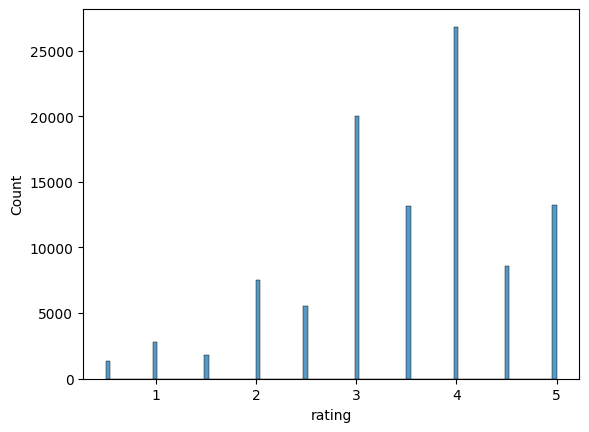

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_triple, x="rating");

In [ ]:
print(f"Number of ratings: {df_triple.shape[0]}")
print(f"Number of movies: {df_triple.movieId.nunique()}")
print(f"Number of consumers: {df_triple.userId.nunique()}")

Number of ratings: 100836
Number of movies: 9724
Number of consumers: 610


In [ ]:
df_triple.movieId.value_counts()

,count
movieId,
356,329
318,317
296,307
593,279
2571,278
...,...
188833,1
189381,1
3899,1


In [ ]:
print('Min:\t\t', df_triple['movieId'].value_counts().min())
print('Quartile 1:\t', df_triple['movieId'].value_counts().quantile(.25))
print('Median:\t\t', df_triple['movieId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_triple['movieId'].value_counts().quantile(.75))
print('Max:\t\t', df_triple['movieId'].value_counts().max())

Min:		 1
Quartile 1:	 1.0
Median:		 3.0
Quartile 3:	 9.0
Max:		 329


In [ ]:
value_counts = df_triple.movieId.value_counts()
keep_list = value_counts[value_counts >= 9]
df_triple = df_triple.loc[df_triple['movieId'].isin(keep_list.index)]
print(df_triple.shape)

(82664, 4)


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Count the number of users and items
U = df_triple['userId'].nunique()
I = df_triple['movieId'].nunique()

# Mapping actual user and item IDs to their position in the matrix
user_mapper = dict(zip(np.unique(df_triple['userId']), list(range(U))))
item_mapper = dict(zip(np.unique(df_triple['movieId']), list(range(I))))

# Reverse the mapping for later use in recommendations
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_triple['userId'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_triple['movieId'])))

# Create an list of userIDs and itemIDs for every rating in the dataset
user_index = [user_mapper[i] for i in df_triple['userId']]
item_index = [item_mapper[i] for i in df_triple['movieId']]

X = csr_matrix((df_triple['rating'], (item_index, user_index)), shape=(I, U))
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 82664 stored elements and shape (2441, 610)>
  Coords	Values
  (0, 0)	4.0
  (0, 4)	4.0
  (0, 6)	4.5
  (0, 14)	2.5
  (0, 16)	4.5
  (0, 17)	3.5
  (0, 18)	4.0
  (0, 20)	3.5
  (0, 26)	3.0
  (0, 30)	5.0
  (0, 31)	3.0
  (0, 32)	3.0
  (0, 39)	5.0
  (0, 42)	5.0
  (0, 43)	3.0
  (0, 44)	4.0
  (0, 45)	5.0
  (0, 49)	3.0
  (0, 53)	3.0
  (0, 56)	5.0
  (0, 62)	5.0
  (0, 63)	4.0
  (0, 65)	4.0
  (0, 67)	2.5
  (0, 70)	5.0
  :	:
  (2438, 600)	4.5
  (2439, 61)	3.5
  (2439, 97)	3.0
  (2439, 152)	0.5
  (2439, 209)	4.5
  (2439, 248)	4.5
  (2439, 379)	0.5
  (2439, 413)	4.5
  (2439, 513)	2.0
  (2439, 514)	4.0
  (2439, 566)	2.0
  (2439, 585)	5.0
  (2439, 595)	3.5
  (2440, 24)	5.0
  (2440, 61)	4.0
  (2440, 97)	5.0
  (2440, 232)	2.5
  (2440, 247)	4.5
  (2440, 248)	5.0
  (2440, 304)	5.0
  (2440, 330)	4.0
  (2440, 337)	1.0
  (2440, 379)	3.0
  (2440, 513)	3.5
  (2440, 585)	4.0


In [ ]:
def create_matrix(df, user, item, rating):
  import numpy as np
  from scipy.sparse import csr_matrix

  U = df[user].nunique()  # Number of users for the matrix
  I = df[item].nunique()  # Number of items for the matrix

  # Map user and movie IDs to matrix indices
  user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
  item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

  # Map matrix indices back to IDs
  user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
  item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

  # Create a list of index values for the csr_matrix for users and movies
  user_index = [user_mapper[i] for i in df[user]]
  item_index = [item_mapper[i] for i in df[item]]

  # Build the final matrix which will look like: (movieId, userId) rating
  X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

  return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [ ]:
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_triple, 'userId', 'movieId', 'rating')
print(user_mapper)
print(user_inv_mapper)
print(user_index)
print(X)

{np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(7): 6, np.int64(8): 7, np.int64(9): 8, np.int64(10): 9, np.int64(11): 10, np.int64(12): 11, np.int64(13): 12, np.int64(14): 13, np.int64(15): 14, np.int64(16): 15, np.int64(17): 16, np.int64(18): 17, np.int64(19): 18, np.int64(20): 19, np.int64(21): 20, np.int64(22): 21, np.int64(23): 22, np.int64(24): 23, np.int64(25): 24, np.int64(26): 25, np.int64(27): 26, np.int64(28): 27, np.int64(29): 28, np.int64(30): 29, np.int64(31): 30, np.int64(32): 31, np.int64(33): 32, np.int64(34): 33, np.int64(35): 34, np.int64(36): 35, np.int64(37): 36, np.int64(38): 37, np.int64(39): 38, np.int64(40): 39, np.int64(41): 40, np.int64(42): 41, np.int64(43): 42, np.int64(44): 43, np.int64(45): 44, np.int64(46): 45, np.int64(47): 46, np.int64(48): 47, np.int64(49): 48, np.int64(50): 49, np.int64(51): 50, np.int64(52): 51, np.int64(53): 52, np.int64(54): 53, np.int64(55): 54, np.int64(56): 55, np.int64(5

In [ ]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
  from sklearn.neighbors import NearestNeighbors

  rec_ids = []                # Make a list for the recommended item IDs we'll get later
  item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
  item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

  # Fit the clustering algorithm based on the user-item matrix X
  knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)

  # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
  rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
  rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
  rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
  rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

  # We need to replace the recommended item indeces with their original item IDs
  for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
    rec_ids.append(item_inv_mapper[rec_indeces[i]])

  # It may help to see what this is. The distance list is first and the recommended item indeces are second
  if messages:
    print(f'List of recommended item indeces:\n{rec_indeces}\n')
    print(f'List of recommended item IDs:\n{rec_ids}\n')
    print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

  # Return two lists: the original item IDs of the recommendations and their similarity scores
  return rec_ids, rec_distances

movie_id = 1
rec_ids, rec_distances = recommend(movie_id, X, item_mapper, item_inv_mapper, k=10)

print(f"If you like {df_movies.loc[movie_id, 'title']}, you may also enjoy:\n")
print(f"\t{df_movies.loc[rec_ids, 'title']}")

List of recommended item indeces:
[   0 1163  238  336  135  184  189  498  304  546  551]

List of recommended item IDs:
[np.int64(3114), np.int64(480), np.int64(780), np.int64(260), np.int64(356), np.int64(364), np.int64(1210), np.int64(648), np.int64(1265), np.int64(1270)]

List of recommended item similarity to selected item:
[0.42739874 0.4343632  0.43573831 0.44261183 0.45290409 0.45885465
 0.4589107  0.46108723 0.46583124 0.46961865]

If you like Jumanji (1995), you may also enjoy:

	3114    Greatest Story Ever Told, The (1965)
480                 Terminal Velocity (1994)
780                        Cinderella (1950)
260                         Quiz Show (1994)
356             Age of Innocence, The (1993)
364             Beverly Hills Cop III (1994)
1210            187 (One Eight Seven) (1997)
648                    Chain Reaction (1996)
1265                    Sliding Doors (1998)
1270       I Love You, I Love You Not (1996)
Name: title, dtype: object


In [ ]:
user_id = 150
k = 20

df_user_ratings = df_triple[(df_triple['userId']==user_id) & (df_triple['rating']>=4)]
df_user_ratings.sort_values(by=['rating'], ascending=False)

df_results = pd.DataFrame(columns=['distance'])

for row in df_user_ratings.itertuples():
  rec_ids, rec_distances = recommend(row.movieId, X, item_mapper, item_inv_mapper, k=k, messages=False)
  for j, i in enumerate(rec_ids):
    df_results.loc[i] = rec_distances[j]

df_results = df_results.sort_values(by=['distance'])

df_movies.set_index('movieId', inplace=True)


In [ ]:
for row in df_results.head(10).itertuples():
  print(df_movies.loc[row[0], 'title'])

Jurassic Park (1993)
Reservoir Dogs (1992)
Goodfellas (1990)
Star Trek II: The Wrath of Khan (1982)
Apocalypse Now (1979)
Monty Python and the Holy Grail (1975)
Godfather, The (1972)
Silence of the Lambs, The (1991)
Usual Suspects, The (1995)
Taxi Driver (1976)


In [ ]:
k = 5

df_recommendations = pd.DataFrame(columns=['title'], index=item_mapper)
for i in range(1, k + 1):
  df_recommendations[f'Recommendation {i}'] = None

for row in df_recommendations.itertuples():
  rec_ids, rec_distances = recommend(row[0], X, item_mapper, item_inv_mapper, k=k, messages=False)
  df_recommendations.at[row[0], 'title'] = df_movies.at[row[0], 'title']

  for i, r in enumerate(rec_ids):
    df_recommendations.at[row[0], f"Recommendation {i + 1}"] = df_movies.at[r, 'title']

df_recommendations

,title,Recommendation 1,Recommendation 2,Recommendation 3,Recommendation 4,Recommendation 5
1,Toy Story (1995),Toy Story 2 (1999),Jurassic Park (1993),Independence Day (a.k.a. ID4) (1996),Star Wars: Episode IV - A New Hope (1977),Forrest Gump (1994)
2,Jumanji (1995),"Lion King, The (1994)",Mrs. Doubtfire (1993),"Mask, The (1994)",Jurassic Park (1993),Home Alone (1990)
3,Grumpier Old Men (1995),Grumpy Old Men (1993),Striptease (1996),"Nutty Professor, The (1996)",Twister (1996),Father of the Bride Part II (1995)
5,Father of the Bride Part II (1995),Sabrina (1995),"Juror, The (1996)",Striptease (1996),Mr. Holland's Opus (1995),Grumpier Old Men (1995)
6,Heat (1995),"Rock, The (1996)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Léon: The Professional (a.k.a. The Professiona...,Casino (1995),Fargo (1996)
...,...,...,...,...,...,...
175303,It (2017),Prisoners (2013),We're the Millers (2013),The Hateful Eight (2015),Now You See Me (2013),Pitch Perfect (2012)
176371,Blade Runner 2049 (2017),Dunkirk (2017),Thor: Ragnarok (2017),Guardians of the Galaxy 2 (2017),Wonder Woman (2017),Baby Driver (2017)
177765,Coco (2017),Guardians of the Galaxy 2 (2017),Thor: Ragnarok (2017),Ratatouille (2007),Star Wars: The Last Jedi (2017),Deadpool 2 (2018)
179819,Star Wars: The Last Jedi (2017),Untitled Spider-Man Reboot (2017),Black Panther (2017),Thor: Ragnarok (2017),Guardians of the Galaxy 2 (2017),X-Men: Apocalypse (2016)


## Section 4

In [ ]:
import pandas as pd

df_movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/movies.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ratings.csv')

df_movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


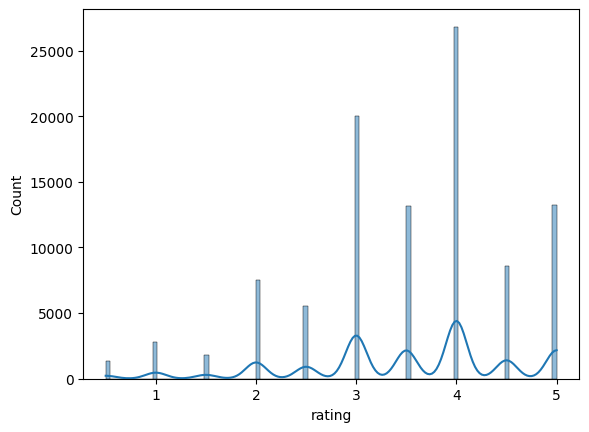

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_ratings, x="rating", kde=True);

In [ ]:
print(f"Number of movies: {df_ratings.movieId.nunique()}")
print(f"Number of users: {df_ratings.userId.nunique()}")
print(f"Number of ratings: {df_ratings.shape[0]}")
print(f"Possible ratings: {df_ratings.movieId.nunique() * df_ratings.userId.nunique()}")
print(f"Sparseness: {1 - (df_ratings.shape[0] / (df_ratings.movieId.nunique() * df_ratings.userId.nunique()))}")

Number of movies: 9724
Number of users: 610
Number of ratings: 100836
Possible ratings: 5931640
Sparseness: 0.9830003169443864


In [ ]:
print('Min:\t\t', df_ratings['movieId'].value_counts().min())
print('Quartile 1:\t', df_ratings['movieId'].value_counts().quantile(.25))
print('Median:\t\t', df_ratings['movieId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_ratings['movieId'].value_counts().quantile(.75))
print('Max:\t\t', df_ratings['movieId'].value_counts().max())
print()
print('Min:\t\t', df_ratings['userId'].value_counts().min())
print('Quartile 1:\t', df_ratings['userId'].value_counts().quantile(.25))
print('Median:\t\t', df_ratings['userId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_ratings['userId'].value_counts().quantile(.75))
print('Max:\t\t', df_ratings['userId'].value_counts().max())

Min:		 1
Quartile 1:	 1.0
Median:		 3.0
Quartile 3:	 9.0
Max:		 329

Min:		 20
Quartile 1:	 35.0
Median:		 70.5
Quartile 3:	 168.0
Max:		 2698


In [ ]:
value_counts = df_ratings['movieId'].value_counts()
keep_list = value_counts[value_counts >= 9]
display(keep_list)
df_ratings = df_ratings.loc[df_ratings['movieId'].isin(keep_list.index)]
print(df_ratings.shape)

print('Min:\t\t', df_ratings['movieId'].value_counts().min())
print('Quartile 1:\t', df_ratings['movieId'].value_counts().quantile(.25))
print('Median:\t\t', df_ratings['movieId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_ratings['movieId'].value_counts().quantile(.75))
print('Max:\t\t', df_ratings['movieId'].value_counts().max())

,count
movieId,
356,329
318,317
296,307
593,279
2571,278
...,...
46948,9
1280,9
5247,9


(82664, 4)
Min:		 9
Quartile 1:	 13.0
Median:		 21.0
Quartile 3:	 41.0
Max:		 329


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Count the number of users and items
U = df_ratings.userId.nunique()
I = df_ratings.movieId.nunique()

# Match the actual user and item IDs with consequtive intergers from 0 to n
user_mapper = dict(zip(np.unique(df_ratings.userId), list(range(U))))
item_mapper = dict(zip(np.unique(df_ratings.movieId), list(range(I))))

# Reverse the mapping
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_ratings.userId)))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_ratings.movieId)))

# Create lists of users/items for each rating
user_index = [user_mapper[i] for i in df_ratings['userId']]
item_index = [item_mapper[i] for i in df_ratings['movieId']]

X = csr_matrix((df_ratings['rating'], (item_index, user_index)), shape=(I, U))
print(U, I)
print(user_mapper)
print(user_inv_mapper)
print(user_index)
print(X)

610 2441
{np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(7): 6, np.int64(8): 7, np.int64(9): 8, np.int64(10): 9, np.int64(11): 10, np.int64(12): 11, np.int64(13): 12, np.int64(14): 13, np.int64(15): 14, np.int64(16): 15, np.int64(17): 16, np.int64(18): 17, np.int64(19): 18, np.int64(20): 19, np.int64(21): 20, np.int64(22): 21, np.int64(23): 22, np.int64(24): 23, np.int64(25): 24, np.int64(26): 25, np.int64(27): 26, np.int64(28): 27, np.int64(29): 28, np.int64(30): 29, np.int64(31): 30, np.int64(32): 31, np.int64(33): 32, np.int64(34): 33, np.int64(35): 34, np.int64(36): 35, np.int64(37): 36, np.int64(38): 37, np.int64(39): 38, np.int64(40): 39, np.int64(41): 40, np.int64(42): 41, np.int64(43): 42, np.int64(44): 43, np.int64(45): 44, np.int64(46): 45, np.int64(47): 46, np.int64(48): 47, np.int64(49): 48, np.int64(50): 49, np.int64(51): 50, np.int64(52): 51, np.int64(53): 52, np.int64(54): 53, np.int64(55): 54, np.int64(56): 55, n

In [ ]:
def create_matrix(df, user, item, rating):
  import numpy as np
  from scipy.sparse import csr_matrix

  U = df[user].nunique()  # Number of users for the matrix
  I = df[item].nunique()  # Number of items for the matrix

  # Map user and movie IDs to matrix indices
  user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
  item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

  # Map matrix indices back to IDs
  user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
  item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

  # Create a list of index values for the csr_matrix for users and movies
  user_index = [user_mapper[i] for i in df[user]]
  item_index = [item_mapper[i] for i in df[item]]

  # Build the final matrix which will look like: (movieId, userId) rating
  X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

  return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_triple, 'userId', 'movieId', 'rating')

In [ ]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
  from sklearn.neighbors import NearestNeighbors

  rec_ids = []                # Make a list for the recommended item IDs we'll get later
  item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
  item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

  # Fit the clustering algorithm based on the user-item matrix X
  knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)

  # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
  rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
  rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
  rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
  rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

  # We need to replace the recommended item indeces with their original item IDs
  for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
    rec_ids.append(item_inv_mapper[rec_indeces[i]])

  # It may help to see what this is. The distance list is first and the recommended item indeces are second
  if messages:
    print(f'List of recommended item indeces:\n{rec_indeces}\n')
    print(f'List of recommended item IDs:\n{rec_ids}\n')
    print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

  # Return two lists: the original item IDs of the recommendations and their similarity scores
  return rec_ids, rec_distances

In [ ]:
# Use any movie id here to get recommendations
movie_id = 95
rec_ids, rec_distances = recommend(movie_id, X, item_mapper, item_inv_mapper, k=10)

print(f"If you like {df_movies.loc[movie_id, 'title']}, you may also enjoy:\n")
print(f"\t{df_movies.loc[rec_ids, 'title']}")

List of recommended item indeces:
[ 55 340 324 246 336 304  64   4 323 198  69]

List of recommended item IDs:
[np.int64(786), np.int64(736), np.int64(494), np.int64(780), np.int64(648), np.int64(112), np.int64(6), np.int64(733), np.int64(376), np.int64(141)]

List of recommended item similarity to selected item:
[0.43563287 0.45943536 0.46336037 0.5197952  0.52763157 0.53059381
 0.5364971  0.5491601  0.55511851 0.57265249]

If you like Muppet Treasure Island (1996), you may also enjoy:

	786                                         Dumbo (1941)
736                                Penny Serenade (1941)
494                             Little Big League (1994)
780                                    Cinderella (1950)
648                                Chain Reaction (1996)
112                                          Jade (1995)
6                                         Sabrina (1995)
733                         It's a Wonderful Life (1946)
376    City Slickers II: The Legend of Curly's Gol

In [ ]:
user_id = 150
k = 20

df_user_ratings = df_ratings[df_ratings['userId']==user_id].sort_values(by=['rating'], ascending=False)
df_user_ratings = df_user_ratings.head(3)

df_results = pd.DataFrame(columns=['distance'])

for row in df_user_ratings.itertuples():
  rec_ids, rec_distances = recommend(row.movieId, X, item_mapper, item_inv_mapper, k=k, messages=False)
  for i, rec_id in enumerate(rec_ids):
    df_results.at[rec_id, 'distance'] = rec_distances[i]

print(df_results.shape)
df_results.sort_values(by=['distance'])

(49, 1)


,distance
1374,0.403411
296,0.432302
47,0.45821
608,0.465662
1375,0.479482
1376,0.482495
457,0.484857
50,0.486052
480,0.486117
1372,0.488303


In [ ]:
k = 5
df_recommendations = pd.DataFrame(columns=['title'], index=item_mapper)
# df_movies.set_index('movieId', inplace=True)

for row in df_recommendations.itertuples():
  rec_ids, rec_distances = recommend(row[0], X, item_mapper, item_inv_mapper, k=k, messages=False)
  df_recommendations.at[row[0], 'title'] = df_movies.at[row[0], 'title']
  for i, r in enumerate(rec_ids):
    df_recommendations.at[row[0], f'Recommendation {i + 1}'] = df_movies.at[r, 'title']

df_recommendations

,title,Recommendation 1,Recommendation 2,Recommendation 3,Recommendation 4,Recommendation 5
1,Toy Story (1995),Toy Story 2 (1999),Jurassic Park (1993),Independence Day (a.k.a. ID4) (1996),Star Wars: Episode IV - A New Hope (1977),Forrest Gump (1994)
2,Jumanji (1995),"Lion King, The (1994)",Mrs. Doubtfire (1993),"Mask, The (1994)",Jurassic Park (1993),Home Alone (1990)
3,Grumpier Old Men (1995),Grumpy Old Men (1993),Striptease (1996),"Nutty Professor, The (1996)",Twister (1996),Father of the Bride Part II (1995)
5,Father of the Bride Part II (1995),Sabrina (1995),"Juror, The (1996)",Striptease (1996),Mr. Holland's Opus (1995),Grumpier Old Men (1995)
6,Heat (1995),"Rock, The (1996)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Léon: The Professional (a.k.a. The Professiona...,Casino (1995),Fargo (1996)
...,...,...,...,...,...,...
175303,It (2017),Prisoners (2013),We're the Millers (2013),The Hateful Eight (2015),Now You See Me (2013),Pitch Perfect (2012)
176371,Blade Runner 2049 (2017),Dunkirk (2017),Thor: Ragnarok (2017),Guardians of the Galaxy 2 (2017),Wonder Woman (2017),Baby Driver (2017)
177765,Coco (2017),Guardians of the Galaxy 2 (2017),Thor: Ragnarok (2017),Ratatouille (2007),Star Wars: The Last Jedi (2017),Deadpool 2 (2018)
179819,Star Wars: The Last Jedi (2017),Untitled Spider-Man Reboot (2017),Black Panther (2017),Thor: Ragnarok (2017),Guardians of the Galaxy 2 (2017),X-Men: Apocalypse (2016)


## Section 3

In [ ]:
import pandas as pd

df_movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/movies.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ratings.csv')

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<Axes: xlabel='rating', ylabel='Count'>

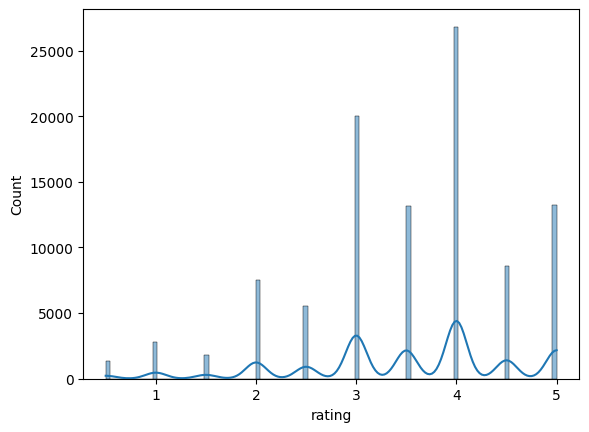

In [ ]:
import seaborn as sns

sns.histplot(data=df_ratings, x="rating", kde=True)

In [ ]:
n_ratings = len(df_ratings)
n_movies = len(df_ratings['movieId'].unique())
n_users = len(df_ratings['userId'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")
print(f"Total possible ratings: {n_movies * n_users}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average ratings per user: 165.3
Average ratings per movie: 10.37
Total possible ratings: 5931640


In [ ]:
print('Min:\t\t', df_ratings['movieId'].value_counts().min())
print('Quartile 1:\t', df_ratings['movieId'].value_counts().quantile(.25))
print('Median:\t\t', df_ratings['movieId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_ratings['movieId'].value_counts().quantile(.75))
print('Max:\t\t', df_ratings['movieId'].value_counts().max())

Min:		 1
Quartile 1:	 1.0
Median:		 3.0
Quartile 3:	 9.0
Max:		 329


In [ ]:
value_counts = df_ratings['movieId'].value_counts()
keep_list = value_counts[value_counts >= 9]
df_ratings = df_ratings.loc[df_ratings['movieId'].isin(keep_list.index)]
df_ratings.shape

(82664, 4)

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Counting the number of movies and users
U = df_ratings['userId'].nunique()
I = df_ratings['movieId'].nunique()

# Create a dictionary to map the user and item IDs to consecutive, integers with not missing values
user_mapper = dict(zip(np.unique(df_ratings['userId']), list(range(U))))
item_mapper = dict(zip(np.unique(df_ratings['movieId']), list(range(I))))

user_inv_mapper = dict(zip(list(range(U)), np.unique(df_ratings['userId'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_ratings['movieId'])))

user_index = [user_mapper[i] for i in df_ratings['userId']]
item_index = [item_mapper[i] for i in df_ratings['movieId']]

X = csr_matrix((df_ratings['rating'], (item_index, user_index)), shape=(I, U))
print(U, I)
print(user_mapper)
print(user_inv_mapper)
print(user_index)
print(item_index)
print(X)

610 2441
{np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(7): 6, np.int64(8): 7, np.int64(9): 8, np.int64(10): 9, np.int64(11): 10, np.int64(12): 11, np.int64(13): 12, np.int64(14): 13, np.int64(15): 14, np.int64(16): 15, np.int64(17): 16, np.int64(18): 17, np.int64(19): 18, np.int64(20): 19, np.int64(21): 20, np.int64(22): 21, np.int64(23): 22, np.int64(24): 23, np.int64(25): 24, np.int64(26): 25, np.int64(27): 26, np.int64(28): 27, np.int64(29): 28, np.int64(30): 29, np.int64(31): 30, np.int64(32): 31, np.int64(33): 32, np.int64(34): 33, np.int64(35): 34, np.int64(36): 35, np.int64(37): 36, np.int64(38): 37, np.int64(39): 38, np.int64(40): 39, np.int64(41): 40, np.int64(42): 41, np.int64(43): 42, np.int64(44): 43, np.int64(45): 44, np.int64(46): 45, np.int64(47): 46, np.int64(48): 47, np.int64(49): 48, np.int64(50): 49, np.int64(51): 50, np.int64(52): 51, np.int64(53): 52, np.int64(54): 53, np.int64(55): 54, np.int64(56): 55, n

In [ ]:
def create_matrix(df, user, item, rating):
  import numpy as np
  from scipy.sparse import csr_matrix

  U = df[user].nunique()  # Number of users for the matrix
  I = df[item].nunique()  # Number of items for the matrix

  # Map user and movie IDs to matrix indices
  user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
  item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

  # Map matrix indices back to IDs
  user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
  item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

  # Create a list of index values for the csr_matrix for users and movies
  user_index = [user_mapper[i] for i in df[user]]
  item_index = [item_mapper[i] for i in df[item]]

  # Build the final matrix which will look like: (movieId, userId) rating
  X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

  return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [ ]:
 X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_triple, 'userId', 'movieId', 'rating')

In [ ]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
  from sklearn.neighbors import NearestNeighbors

  rec_ids = []                # Make a list for the recommended item IDs we'll get later
  item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
  item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

  # Fit the clustering algorithm based on the user-item matrix X
  knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)

  # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
  rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
  rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
  rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
  rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

  # We need to replace the recommended item indeces with their original item IDs
  for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
    rec_ids.append(item_inv_mapper[rec_indeces[i]])

  # It may help to see what this is. The distance list is first and the recommended item indeces are second
  if messages:
    print(f'List of recommended item indeces:\n{rec_indeces}\n')
    print(f'List of recommended item IDs:\n{rec_ids}\n')
    print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

  # Return two lists: the original item IDs of the recommendations and their similarity scores
  return rec_ids, rec_distances

In [ ]:
movie_id = 2
rec_ids, rec_distances = recommend(movie_id, X, item_mapper, item_inv_mapper, k=10)

print(f"If you like {df_movies.loc[movie_id, 'title']}, you may also enjoy:\n")
df_movies.loc[rec_ids, 'title']

List of recommended item indeces:
[  1 189 248 191 238 282 275 284 290  15 163]

List of recommended item IDs:
[np.int64(364), np.int64(500), np.int64(367), np.int64(480), np.int64(586), np.int64(551), np.int64(588), np.int64(595), np.int64(19), np.int64(317)]

List of recommended item similarity to selected item:
[0.41156227 0.45018189 0.45501892 0.46195443 0.47512358 0.48183868
 0.48438002 0.49254201 0.50243974 0.50263249]

If you like Grumpier Old Men (1995), you may also enjoy:



,title
364,Beverly Hills Cop III (1994)
500,Princess Caraboo (1994)
367,Blown Away (1994)
480,Terminal Velocity (1994)
586,"Haunted World of Edward D. Wood Jr., The (1996)"
551,James and the Giant Peach (1996)
588,"Great White Hype, The (1996)"
595,Barb Wire (1996)
19,Money Train (1995)
317,I Like It Like That (1994)


In [ ]:
user = 150
k = 20

df_user_ratings = df_triple[df_triple.userId==user].sort_values(by=['rating'], ascending=False).head()

df_results = pd.DataFrame(columns=['distance'])

for row in df_user_ratings.itertuples():
  rec_ids, rec_distances = recommend(row.movieId, X, item_mapper, item_inv_mapper, k=10, messages=False)
  for i, rec_id in enumerate(rec_ids):
    df_results.at[rec_id, 'distance'] = rec_distances[i]


df_results.sort_values(by=['distance'])

,distance
1374,0.403411
296,0.432302
589,0.437787
47,0.45821
1375,0.479482
1376,0.482495
457,0.484857
50,0.486052
480,0.486117
1372,0.488303


In [ ]:
k = 5
df_recommendations = pd.DataFrame(columns=['title'], index=item_mapper)
df_movies.set_index('movieId', inplace=True)

for row in df_recommendations.itertuples():
  rec_ids, rec_distances = recommend(row[0], X, item_mapper, item_inv_mapper, k=k, messages=False)
  df_recommendations.at[row[0], 'title'] = df_movies.at[row[0], 'title']
  for i, r in enumerate(rec_ids):
    df_recommendations.at[row[0], f'Recommendation {i + 1}'] = df_movies.at[r, 'title']

df_recommendations

,title,Recommendation 1,Recommendation 2,Recommendation 3,Recommendation 4,Recommendation 5
1,Toy Story (1995),Toy Story 2 (1999),Jurassic Park (1993),Independence Day (a.k.a. ID4) (1996),Star Wars: Episode IV - A New Hope (1977),Forrest Gump (1994)
2,Jumanji (1995),"Lion King, The (1994)",Mrs. Doubtfire (1993),"Mask, The (1994)",Jurassic Park (1993),Home Alone (1990)
3,Grumpier Old Men (1995),Grumpy Old Men (1993),Striptease (1996),"Nutty Professor, The (1996)",Twister (1996),Father of the Bride Part II (1995)
5,Father of the Bride Part II (1995),Sabrina (1995),"Juror, The (1996)",Striptease (1996),Mr. Holland's Opus (1995),Grumpier Old Men (1995)
6,Heat (1995),"Rock, The (1996)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Léon: The Professional (a.k.a. The Professiona...,Casino (1995),Fargo (1996)
...,...,...,...,...,...,...
175303,It (2017),Prisoners (2013),We're the Millers (2013),The Hateful Eight (2015),Now You See Me (2013),Pitch Perfect (2012)
176371,Blade Runner 2049 (2017),Dunkirk (2017),Thor: Ragnarok (2017),Guardians of the Galaxy 2 (2017),Wonder Woman (2017),Baby Driver (2017)
177765,Coco (2017),Guardians of the Galaxy 2 (2017),Thor: Ragnarok (2017),Ratatouille (2007),Star Wars: The Last Jedi (2017),Deadpool 2 (2018)
179819,Star Wars: The Last Jedi (2017),Untitled Spider-Man Reboot (2017),Black Panther (2017),Thor: Ragnarok (2017),Guardians of the Galaxy 2 (2017),X-Men: Apocalypse (2016)
